In [1]:
from ultralytics import YOLO
import ultralytics
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2
import numpy as np

In [2]:
# Load a model
model = YOLO("yolov8s.yaml")  # build a new model from scratch
model = YOLO("yolov8s.pt")  # load a pretrained model (recommended for training)

In [ ]:
# Use the model
model.train(data="vinbig.yaml",epochs=50)  # train the model

In [ ]:
metrics = model.val(save_json=True, save_hybrid=True)

In [ ]:
results = model("../path/to/example.png")  # predict on an image

In [ ]:
# Extract bounding boxes, classes, names, and confidences
boxes = results[0].boxes.xyxy.tolist()
classes = results[0].boxes.cls.tolist()
names = results[0].names
confidences = results[0].boxes.conf.tolist()

# Iterate through the results
for box, cls, conf in zip(boxes, classes, confidences):
    x1, y1, x2, y2 = box
    confidence = conf
    detected_class = cls
    name = names[int(cls)]

In [ ]:
boxes, names, classes, confidences

In [10]:
# Function to draw rectangles (bounding boxes)
def draw_rectangles(ground_truth, predictions):
    # Create figure and axes
    fig, ax = plt.subplots()

    # Set the axes limits
    ax.set_xlim([0, 1])
    ax.set_ylim([0, 1])

    # Draw ground truth rectangles in green
    for gt in ground_truth:
        class_id, x_center, y_center, width, height = gt
        rect = patches.Rectangle((x_center - width/2, y_center - height/2), width, height,
                                 linewidth=2, edgecolor='g', facecolor='none', label='Ground Truth')
        ax.add_patch(rect)

    # Draw predicted rectangles in red
    for pred in predictions:
        class_id, x_center, y_center, width, height = pred
        rect = patches.Rectangle((x_center - width/2, y_center - height/2), width, height,
                                 linewidth=2, edgecolor='r', facecolor='none', label='Prediction')
        ax.add_patch(rect)

    # Add a legend
    handles, labels = ax.get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys())

    # Display the plot
    plt.show()

In [14]:
# Example usage (Assuing image shape 1024x1024)
predicted_boxes = [[1, 145.42726135253906/1024, 395.8778991699219/1024, 317.4457092285156/1024, 524.496826171875/1024]]  # Replace with your ground truth boxes
ground_truth_boxes = [[1, 0.6302439024390244, 0.45365853658536587, 0.1951219512195122, 0.16390243902439025]]     # Replace with your predicted boxes

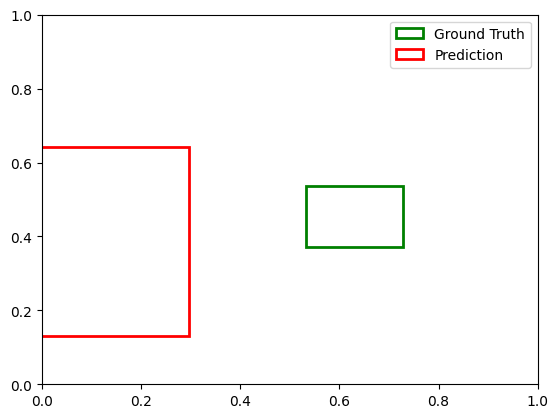

In [15]:
draw_rectangles(ground_truth_boxes, predicted_boxes)
